# Instructions

1. Add your name and HW Group Number below.
2. Complete each question. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", and delete and `throw NotImplementedError()` lines.
3. Where applicable, run the test cases *below* each question to check your work. **Note**: In addition to the test cases you can see, the instructor may run additional test cases, including using *other datasets* to validate you code.
4. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). You can also use the **Validate** button to run all test cases.
5. Turn in your homework by going to the main screen in JupyterHub, clicking the Assignments menu, and submitting.



In [ ]:
"""
Name: Ben Layko
HW Group Number: 5
"""

### HW3 Problem 1: Linear Regression

In this exercise, you will apply linear regression and Lasso regression methods to the dataset supplied to you and then compare their results to determine whether Lasso regression is needed for this dataset. Additionally, you will use sklearn's pipeline framework, which is so helpful when you have a sequence of transforms (e.g. normalization) and estimators (e.g. classifiers or regressors). 

**Dataset description**: You are provided a dataset with 20 variables. Variables $x1\ -\ x19$ refer to the independent variables, while variable $y$ is your dependent variable. Training data is stored in the file `/etc/data/regression-train.csv`.

**Note**: TAs will use a test set to verify your solution. The format (independent variables $x1\ -\ x19$, dependent variable  $y$) will be same, but TAs' file may contain different number of data points than the split version from training set. Please ensure you take this into account, and do not hard code any dimensions.


In [1]:
#Import necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
df = pd.read_csv("/etc/data/regression-train.csv")
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
0,508,44,60,718,42,234,0,0,56,52,8,216,0,1998,472,136,236,12,4,610.0
1,1020,106,198,1620,126,680,2,2,112,104,36,614,0,5744,1642,294,348,14,20,2300.0
2,1118,146,828,704,32,698,2,2,96,122,18,842,0,6324,1748,282,718,16,4,1850.0
3,922,70,452,222,48,150,0,0,108,108,22,152,2,1360,320,224,98,4,36,270.0
4,526,60,294,162,18,164,2,2,52,46,8,166,0,1776,440,140,172,8,2,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,630,50,78,996,48,188,2,2,70,120,26,136,0,1260,302,152,110,6,26,310.0
128,330,32,38,664,4,20,0,2,26,18,4,36,2,392,88,78,36,6,4,150.0
129,1146,156,262,2628,194,840,0,0,170,120,24,940,0,6396,1714,288,664,16,18,1920.0
130,472,22,398,250,2,128,0,0,54,30,26,232,2,2230,540,112,114,8,0,460.0


## Part 1: Linear Regression
You will write code in the function `linear_regression_pipeline` to normalize and train simple linear regression using pipeline. For regression, it is particularly important to normalize our data before training the model, so we can better interpret our coefficients.

Detailed instructions for implementation and allowed packages have been provided in the comments.

Before your begin, read the documentation on sklearn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def linear_regression_pipeline(): 
    # Perform linear regression
    # No Input!

    # Output:
    # A pipeline that normalizes the data and performs simple linear regression
  
    # allowed packages: sklearn.preprocessing, sklearn.linear_model and sklearn.pipeline
  
    # Function hints: Read the documentation for the function Pipeline (link above)
    
    # write code for building a linear regression model using X, y
    regression = LinearRegression(normalize = True, copy_X= True).fit(X, y)
    pipe = Pipeline(steps=[('scaler', StandardScaler()), ('LR', regression)])
    return pipe

In [15]:
# Your pipeline should include a standard scaler, followed by a LR model
pipe = linear_regression_pipeline()
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR', LinearRegression(normalize=True))])

In [17]:
# You can get the individual pieces of your pipeline by name
# Note: You should replace 'linear' with whatever name you gave the LR model
pipe['LR']

LinearRegression(normalize=True)

Cross-validation has two widely-used applications: optimizing (tuning) hyperparameters and evaluating the performance of machine learning models. There are different ways to implement cross-validation for evaluating regression. In this homework, you are required to use the function `cross_validate()` since it allows us to pass multiple scoring metrics simultaneously. You need to use root mean square error (RMSE) and mean absolute error (MAE). You can find the list of scoring metrics names [here](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values).

To get a better insight into the function [cross_validate()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) and the concept of [cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html), take a look at links.

In [1]:
from sklearn.model_selection import cross_validate

def evaluate_model_cv(clf, X, y):
    # Inputs:
    # clf: the classifier or pipeline
    # X: independent attributes(19 variables, x1-x19)
    # y: dependent variable (vector, continous type, y)
    
    # Output:
    # A dictionary which contains the arrays related to scorers
    
    # allowed packages: sklearn.model_selection 
    
    # IMPORTANT note: we will need train scores of your Cross Validation so set the argument "return_train_score" as True
    
    return cross_validate(clf, X, y, scoring=["neg_root_mean_squared_error", "neg_mean_absolute_error"], return_train_score = True)

Have you **noticed** that scores for RMSE and MAE are negative? Why has sklearn decided to provide a negative version of them as default?

In [2]:
# Now test your model

scores = evaluate_model_cv(linear_regression_pipeline(), X, y)

print(f'The mean of CV training RMSE: \n{-scores["train_neg_root_mean_squared_error"].mean()}',
      f'with a standard deviation of {scores["train_neg_root_mean_squared_error"].std()}')
print()
print(f'The mean of CV test RMSE: \n{-scores["test_neg_root_mean_squared_error"].mean()}',
      f'with a standard deviation of {scores["test_neg_root_mean_squared_error"].std()}')

NameError: name 'linear_regression_pipeline' is not defined

You can access the parameters specific to the estimators of a pipeline by their index or name, which is useful in scenarios like below. To find out more, the documentation on [Pipelines and composite estimators](https://scikit-learn.org/stable/modules/compose.html) is helpful.

In [22]:
# Which attributes are most predictive of the outcome variable?

# It is assumed that LinearRegression() is the second component of your pipeline that's why index 1 is called . 
# You can update the index if it has a different position in your implementation

lr_model = linear_regression_pipeline().fit(X,y)
print(f'Model coefficients:\n{lr_model[1].coef_}')

Model coefficients:
[-4.85506628e-01  1.51072612e+02  1.86920788e+02  1.18356951e+02
  4.34612148e+02 -3.69302925e+02  1.32149036e+02 -8.32898630e+01
  3.65647936e+01  4.60077736e+01 -6.09234666e+01 -2.81553261e+02
 -1.34567899e+02 -2.46327897e+03  3.17584946e+03 -1.99829081e+02
  8.85855284e+01 -1.07691888e+02  1.12269390e+02]


In [23]:
# We split dataset to training/testing sets ONLY for testing your pipeline
# They are not needed anywhere else in this assignment

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

lr_model = linear_regression_pipeline().fit(X_train,y_train)
simple_linear_regression_result = lr_model.predict(X_test)
np.testing.assert_equal(simple_linear_regression_result.shape, (27,))
np.testing.assert_almost_equal(evaluate_model_cv(linear_regression_pipeline(), X, y)['train_neg_mean_absolute_error'][2],-403.7440912543305)
np.testing.assert_almost_equal(evaluate_model_cv(linear_regression_pipeline(), X, y)['test_neg_root_mean_squared_error'][1],-585.52899577)

In [ ]:
# Remember, we will also use hidden test cases - you should create your own too

## Part 2: Lasso Regression
You will write code in the function `lasso_regression_pipeline` to train simple lasso regression. Detailed instructions for implementation and allowed packages have been provided in the comments. 

Before your begin, read the documentation on sklearn's [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) - a Lasso regression model that uses CV to tune its hyperparameters.

**Note** that the lasso regression model has *built-in* crossvalidation, which it performs on the training dataset provided, to select the best shrinkage coefficient for the validation data.

In [27]:
from sklearn.linear_model import LassoCV
def lasso_regression_pipeline(random_state=0):
    # Inputs:
    # random_state: a random state to use in CV model training
    
    # General Information:
        # use 10-fold cross validation to determine the best model hyperparameters
    
    # Output:
    # A pipeline which normalize the data and performs lasso regression

  
    # allowed packages: sklearn.linear_model
  
    # Function hints: Read the documentation for functions pipeline and LassoCV (links above)
    
    regression = LassoCV(cv = 10, random_state=random_state)
    pipe = Pipeline(steps=[('scaler', StandardScaler()), ('Lasso', regression)])
    return pipe

**Before testing your model**: Do you expect the training error to be higher or lower? What about the testing error? What do you expect to be different about the coefficients?

In [29]:
# Now test your model
# We can use the model evaluation function that we defined earlier

scores = evaluate_model_cv(lasso_regression_pipeline(), X, y)

print(f'The mean of CV training RMSE: \n{-scores["train_neg_root_mean_squared_error"].mean()}',
      f'with a standard deviation of {scores["train_neg_root_mean_squared_error"].std()}')
print()
print(f'The mean of CV test RMSE: \n{-scores["test_neg_root_mean_squared_error"].mean()}',
      f'with a standard deviation of {scores["test_neg_root_mean_squared_error"].std()}')

The mean of CV training RMSE: 
557.210721315136 with a standard deviation of 86.90440293574433

The mean of CV test RMSE: 
668.7583707472095 with a standard deviation of 236.36331461210918


In [30]:
# Which attributes are most predictive of the outcome variable?

# It is assumed that LinearRegression() is the second component of your pipeline that's why index 1 is called . 
# You can update the index if it has a different position in your implementation

lasso_model = lasso_regression_pipeline().fit(X, y)
print(f'Model coefficients:\n{lasso_model[1].coef_}')

print()
# Note we called this 'lamda' in class, but sklearn calls it alpha (should be ~14.05)
print(f'The shinkage coefficient hyperparameter chosen by CV: {lasso_model[1].alpha_}')

Model coefficients:
[  -0.          158.07311036   33.5272799    77.08926181  119.22238177
   93.61157409   48.94047379    0.            0.            0.
   -2.51163678    0.         -132.35067892    0.          343.58414203
    0.            0.         -146.55285534   68.80125112]

The shinkage coefficient hyperparameter chosen by CV: 14.052973668793825


In [31]:
# We split dataset to training/testing sets ONLY for testing your pipeline
# They are not needed anywhere else in this assignment
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

lasso_model = lasso_regression_pipeline(0).fit(X_train, y_train)
lasso_regression_result = lasso_model.predict(X_test)

np.testing.assert_equal(lasso_regression_result.shape, (27,))
np.testing.assert_almost_equal(evaluate_model_cv(lasso_regression_pipeline(0), X, y)['test_neg_root_mean_squared_error'][4],-583.27902826)
np.testing.assert_almost_equal(evaluate_model_cv(lasso_regression_pipeline(0), X, y)['train_neg_mean_absolute_error'][0],-424.1614152)

In [ ]:
# Remember, we will also use hidden test cases - you should create your own too

From the results, compare the two regression models, including the training and testing RMSE, and the coefficients. Use the output of these functions to answer the following questions below:

1. The dataset contains 19 attributes. Are all 19 attributes useful for predicting the dependent variable? Why or why not? Use your results to justify the answer.
2. If not all attributes are predictive, use your Lasso model to perform feature selection. Which attributes should be kept? Use a correlation and/or scatter plot to justify your answer for at least one attribute (in a new cell below).

The two models performed close to the same, but were slightly different. The lasso regression had a higher training error (which is not abnormal), but did slightly better on the test data. The coefficients of the first regression model all seemed to have some sort of value (ranging from ~10 to ~3000 with one being smaller than 1). Lasso regression had 8 attributes that it reduced to such a small number it displayed as 0.
1. Not all attributs were useful in prediction. One thing to note is that in the the Lasso regression, there were attributes with weights around 0, which means that they did not help in predicting the dependent variable.
2. Any attribute that displayed as 0 could most likely be removed from lasso. These attributes either did not contribute much to the prediction of y, or were explained by other attributes.

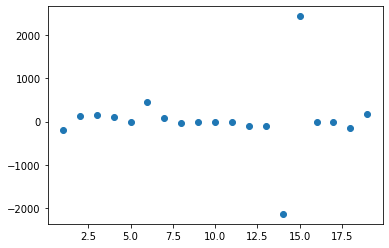

In [38]:
import matplotlib.pyplot as plt
import numpy as mp
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] 
y = lasso_model[1].coef_

plt.scatter(x,y)

**Remember**: Make sure to complete all problems (.ipynb files) in this assignment. When you finish, double-check the submission instructions at the top of this file, and submit on JupyterHub.